In [1]:
import sympy as sy
import sympy.vector as syv

sy.init_printing()

In [2]:
N = syv.CoordSys3D(r'N')

theta_r = sy.symbols(r'\theta_{r}', real=True)
phi_r = sy.symbols(r'\phi_{r}', real=True)

A = sy.sin(theta_r) * sy.cos(phi_r)
B = sy.sin(theta_r) * sy.sin(phi_r)
C = sy.cos(theta_r)

DA = sy.Dummy(r'A')
DB = sy.Dummy(r'B')
DC = sy.Dummy(r'C')

r_c1 = sy.symbols(r'r_{c1}', real=True, positive=True)
theta_c1 = sy.symbols(r'\theta_{c1}', real=True)
phi_c1 = sy.symbols(r'\phi_{c1}', real=True)

represent vectors

In [3]:
r_r = r_c1 / (A*sy.sin(theta_c1)*sy.cos(phi_c1) + B*sy.sin(theta_c1)*sy.sin(phi_c1) + C*sy.cos(theta_c1))

v_r = (A*N.i + B*N.j + C*N.k) * r_r
v_c1 = (sy.sin(theta_c1)*sy.cos(phi_c1)*N.i + sy.sin(theta_c1)*sy.sin(phi_c1)*N.j + sy.cos(theta_c1)*N.k) * r_c1
v_r_0 = r_r.subs(theta_r, 0)*N.k - v_c1
v_rp = v_r - v_c1

represent target coordinates on the image plan

In [4]:
xp_1 = v_rp.magnitude() * ((v_r_0 & v_rp) / (v_r_0.magnitude() * v_rp.magnitude()))
yp_1 = v_rp.magnitude() * ((v_r_0 ^ v_rp) / (v_r_0.magnitude() * v_rp.magnitude())) & (v_c1 / v_c1.magnitude())

DXP1 = sy.Dummy(r'x^{\prime}_{1}')
DYP1 = sy.Dummy(r'y^{\prime}_{1}')

## manipulate $x^{\prime}_{1}$ and $y^{\prime}_{1}$

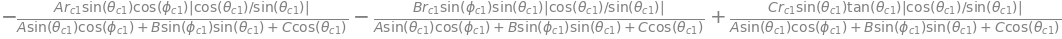

In [5]:
sy.expand(sy.expand_trig(sy.simplify(xp_1))).subs([(A, DA), (B, DB), (C, DC)])

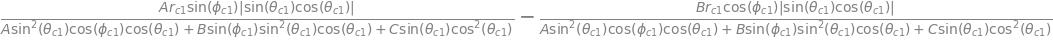

In [6]:
sy.expand(sy.expand_trig(sy.simplify(yp_1))).subs([(A, DA), (B, DB), (C, DC)])

absorb $C$ into $A$ and $B$  
_because absorbing $A$ or $B$ both take about 8 minutes to solve, and their results are miserable compare to absorbing $C$, which by the way only takes about 30 seconds_

In [7]:
xp_1_AB = sy.expand(sy.expand_trig(sy.simplify(xp_1))).subs([(A, DA), (B, DB), (C, 1)])
yp_1_AB = sy.expand(sy.expand_trig(sy.simplify(yp_1))).subs([(A, DA), (B, DB), (C, 1)])

solve for $A$ and $B$

In [8]:
DA_DB_dict = sy.solve([xp_1_AB - DXP1, yp_1_AB - DYP1], (DA, DB))

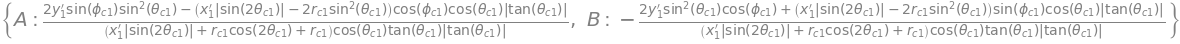

In [9]:
DA_DB_dict

## prepare $x^{\prime}_{2}$ and $y^{\prime}_{2}$ to have a common denominator

define symbols and represent coordinates

In [10]:
r_c2 = sy.symbols(r'r_{c2}', real=True, positive=True)
theta_c2 = sy.symbols(r'\theta_{c2}', real=True)
phi_c2 = sy.symbols(r'\phi_{c2}', real=True)

xp_2 = xp_1_AB.subs([(r_c1, r_c2), (theta_c1, theta_c2), (phi_c1, phi_c2)])
yp_2 = yp_1_AB.subs([(r_c1, r_c2), (theta_c1, theta_c2), (phi_c1, phi_c2)])

DXP2 = sy.Dummy(r'x^{\prime}_{2}')
DYP2 = sy.Dummy(r'y^{\prime}_{2}')

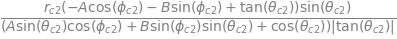

In [11]:
sy.simplify(xp_2)

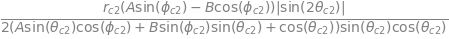

In [12]:
sy.simplify(yp_2)

define common denominator and individual numerator

In [13]:
CD = DA*sy.sin(theta_c2)*sy.cos(phi_c2) + DB*sy.sin(theta_c2)*sy.sin(phi_c2) + sy.cos(theta_c2)
DCD = sy.Dummy(r'D')

xp_2_numerator = sy.simplify(xp_2).subs(CD, DCD) * DCD
yp_2_numerator = sy.simplify(yp_2).subs(CD, DCD) * DCD

In [14]:
CD

In [15]:
xp_2_numerator

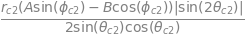

In [16]:
yp_2_numerator

## substitude $A$ and $B$ in $x^{\prime}_{2}$, $y^{\prime}_{2}$ using the solve result

In [17]:
sy.fraction(DA_DB_dict[DA])[1] == sy.fraction(DA_DB_dict[DB])[1]

True

notice that $A$ and $B$ have a common denominator, we will multiply the numerator and denominator of $x^{\prime}_{2}$, $y^{\prime}_{2}$ by this common denominator, to make them polynomials of $x^{\prime}_{1}$ and $y^{\prime}_{1}$

In [18]:
CD_p = sy.collect(
    sy.expand(sy.expand_trig(sy.simplify(
        sy.expand(sy.expand_trig(sy.simplify(
            CD
        ))).subs([(DA, DA_DB_dict[DA]), (DB, DA_DB_dict[DB])])
        * sy.fraction(DA_DB_dict[DA])[1]))
    ),
    (DXP1, DYP1)
)

xp_2_numerator_p = sy.collect(
    sy.expand(sy.expand_trig(sy.simplify(
        sy.expand(sy.expand_trig(sy.simplify(
            xp_2_numerator
        ))).subs([(DA, DA_DB_dict[DA]), (DB, DA_DB_dict[DB])])
        * sy.fraction(DA_DB_dict[DA])[1]))
    ),
    (DXP1, DYP1)
)

yp_2_numerator_p = sy.collect(
    sy.expand(sy.expand_trig(sy.simplify(
        sy.expand(sy.expand_trig(sy.simplify(
            yp_2_numerator
        ))).subs([(DA, DA_DB_dict[DA]), (DB, DA_DB_dict[DB])])
        * sy.fraction(DA_DB_dict[DA])[1]))
    ),
    (DXP1, DYP1)
)

extract the coefficients of $x^{\prime}_{1}$, $y^{\prime}_{1}$

In [19]:
m11 = xp_2_numerator_p.coeff(DXP1)
m12 = xp_2_numerator_p.coeff(DYP1)
m13 = xp_2_numerator_p - m11*DXP1 - m12*DYP1

m21 = yp_2_numerator_p.coeff(DXP1)
m22 = yp_2_numerator_p.coeff(DYP1)
m23 = yp_2_numerator_p - m21*DXP1 - m22*DYP1

m31 = CD_p.coeff(DXP1)
m32 = CD_p.coeff(DYP1)
m33 = CD_p - m31*DXP1 - m32*DYP1

In [20]:
xp_2_f = (m11*DXP1 + m12*DYP1 + m13) / (m31*DXP1 + m32*DYP1 + m33)
yp_2_f = (m21*DXP1 + m22*DYP1 + m23) / (m31*DXP1 + m32*DYP1 + m33)

## result

\begin{align}
    m_{11} &= 2 r_{c2} \left(\sin{\left(\theta_{c1} \right)} + \frac{\cos{\left(\theta_{c1} \right)} \cos{\left(\phi_{c1} - \phi_{c2} \right)}}{\tan{\left(\theta_{c2} \right)}}\right) \sin^{2}{\left(\theta_{c1} \right)} \cos{\left(\theta_{c2} \right)} \left|{\tan{\left(\theta_{c2} \right)}}\right| \\
    m_{12} &= - \frac{2 r_{c2} \sin^{2}{\left(\theta_{c1} \right)} \sin{\left(\theta_{c2} \right)} \sin{\left(\phi_{c1} - \phi_{c2} \right)} \left|{\tan{\left(\theta_{c2} \right)}}\right|}{\tan^{2}{\left(\theta_{c2} \right)}} \\
    m_{13} &= 2 r_{c1} r_{c2} \left(- \frac{\sin{\left(\theta_{c1} \right)} \cos{\left(\phi_{c1} - \phi_{c2} \right)}}{\tan{\left(\theta_{c2} \right)}} + \cos{\left(\theta_{c1} \right)}\right) \sin{\left(\theta_{c1} \right)} \cos{\left(\theta_{c1} \right)} \cos{\left(\theta_{c2} \right)} \left|{\tan{\left(\theta_{c1} \right)} \tan{\left(\theta_{c2} \right)}}\right| \\
\end{align}

\begin{align}
    m_{21} &= \frac{r_{c2} \sin^{2}{\left(\theta_{c1} \right)} \sin{\left(\phi_{c1} - \phi_{c2} \right)} \cos{\left(\theta_{c1} \right)} \left|{\sin{\left(2 \theta_{c2} \right)}}\right|}{\sin{\left(\theta_{c2} \right)} \cos{\left(\theta_{c2} \right)}} \\
    m_{22} &= \frac{r_{c2} \sin^{2}{\left(\theta_{c1} \right)} \cos{\left(\phi_{c1} - \phi_{c2} \right)} \left|{\sin{\left(2 \theta_{c2} \right)}}\right|}{\sin{\left(\theta_{c2} \right)} \cos{\left(\theta_{c2} \right)}} \\
    m_{23} &= \frac{r_{c1} r_{c2} \left(\cos{\left(2 \theta_{c1} \right)} - 1\right)^{2} \sin{\left(\phi_{c1} - \phi_{c2} \right)} \left|{\frac{\sin{\left(2 \theta_{c2} \right)}}{\tan{\left(\theta_{c1} \right)}}}\right|}{\sin{\left(\theta_{c1} - 2 \theta_{c2} \right)} - \sin{\left(\theta_{c1} + 2 \theta_{c2} \right)}} \\
\end{align}

\begin{align}
    m_{31} &= 2 \left(\sin{\left(\theta_{c1} \right)} \cos{\left(\theta_{c2} \right)} - \sin{\left(\theta_{c2} \right)} \cos{\left(\theta_{c1} \right)} \cos{\left(\phi_{c1} - \phi_{c2} \right)}\right) \sin^{2}{\left(\theta_{c1} \right)} \\
    m_{32} &= 2 \sin^{2}{\left(\theta_{c1} \right)} \sin{\left(\theta_{c2} \right)} \sin{\left(\phi_{c1} - \phi_{c2} \right)} \\
    m_{33} &= 2 r_{c1} \left(\sin{\left(\theta_{c1} \right)} \sin{\left(\theta_{c2} \right)} \cos{\left(\phi_{c1} - \phi_{c2} \right)} + \cos{\left(\theta_{c1} \right)} \cos{\left(\theta_{c2} \right)}\right) \sin{\left(\theta_{c1} \right)} \cos{\left(\theta_{c1} \right)} \left|{\tan{\left(\theta_{c1} \right)}}\right| \\
\end{align}

\begin{align}
    x^{\prime}_{2} &= \frac{m_{11} x^{\prime}_{1} + m_{12} y^{\prime}_{1} + m_{13}}{m_{31} x^{\prime}_{1} + m_{32} y^{\prime}_{1} + m_{33}} \\
    y^{\prime}_{2} &= \frac{m_{21} x^{\prime}_{1} + m_{22} y^{\prime}_{1} + m_{23}}{m_{31} x^{\prime}_{1} + m_{32} y^{\prime}_{1} + m_{33}} \\
\end{align}

## verify that nothing has gone wrong in the process

dependency

In [21]:
(m11 + m12 + m13 + m21 + m22 + m23 + m31 + m32 + m33).free_symbols

directly substitude after absorbtion

In [22]:
xp_2_t = xp_2.subs([(DA, DA_DB_dict[DA]), (DB, DA_DB_dict[DB])])
yp_2_t = yp_2.subs([(DA, DA_DB_dict[DA]), (DB, DA_DB_dict[DB])])

In [23]:
n, d = sy.fraction(sy.simplify(xp_2_t))
t = sy.collect(sy.expand(sy.expand_trig(d)), (DXP1, DYP1))
tm21 = t.coeff(DXP1)
tm22 = t.coeff(DYP1)
tm23 = t - tm21*DXP1 - tm22*DYP1

n, d = sy.fraction(sy.simplify(yp_2_t))
t = sy.collect(sy.expand(sy.expand_trig(d)), (DXP1, DYP1))
tm41 = t.coeff(DXP1)
tm42 = t.coeff(DYP1)
tm43 = t - tm41*DXP1 - tm42*DYP1

In [24]:
(tm21 + tm22 + tm23 + tm41 + tm42 + tm43).free_symbols

In [25]:
sy.simplify(tm21/tm41 - tm22/tm42)

In [26]:
sy.simplify(tm22/tm42 - tm23/tm43)

In [27]:
sy.simplify(m31/tm21 - m32/tm22)

In [28]:
sy.simplify(m32/tm22 - m33/tm23)

In [29]:
xp_2_t.free_symbols

In [30]:
import random
tp1 = random.random() * sy.S.Pi * 2
tp2 = random.random() * sy.S.Pi * 2
tt1 = random.random() * sy.S.Pi
tt2 = random.random() * sy.S.Pi
tr1 = random.random() * sy.S.Exp1 * random.randrange(50)
tr2 = random.random() * sy.S.Exp1 * random.randrange(50)
txp1 = random.randrange(4000)
typ1 = random.randrange(4000)

In [31]:
sy.simplify(xp_2_t).subs([
    (DXP1, txp1),
    (DYP1, typ1),
    (theta_c1, tt1),
    (theta_c2, tt2),
    (phi_c1, tp1),
    (phi_c2, tp2),
    (r_c1, tr1),
    (r_c2, tr2)
]).evalf(100) == sy.simplify(xp_2_f).subs([
    (DXP1, txp1),
    (DYP1, typ1),
    (theta_c1, tt1),
    (theta_c2, tt2),
    (phi_c1, tp1),
    (phi_c2, tp2),
    (r_c1, tr1),
    (r_c2, tr2)
]).evalf(100)

True

In [32]:
sy.simplify(yp_2_t).subs([
    (DXP1, txp1),
    (DYP1, typ1),
    (theta_c1, tt1),
    (theta_c2, tt2),
    (phi_c1, tp1),
    (phi_c2, tp2),
    (r_c1, tr1),
    (r_c2, tr2)
]).evalf(100) == sy.simplify(yp_2_f).subs([
    (DXP1, txp1),
    (DYP1, typ1),
    (theta_c1, tt1),
    (theta_c2, tt2),
    (phi_c1, tp1),
    (phi_c2, tp2),
    (r_c1, tr1),
    (r_c2, tr2)
]).evalf(100)

True